<a href="https://colab.research.google.com/github/davidsadovy/data690_fall2022/blob/main/assignment_05/myLecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bike store sales

In this class we'll be analyzing sales made on bike stores.

[Follow this data in a Google Spreadsheet](https://docs.google.com/spreadsheets/d/1NOe_UrPx6ULF2C5MvHmZ9ODuw8t9M77Q1Y64gP-7JHA/edit?usp=sharing)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [5]:
!head data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

In [6]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [7]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [8]:
sales.shape

(47125, 18)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47125 entries, 0 to 47124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              47125 non-null  datetime64[ns]
 1   Day               47125 non-null  int64         
 2   Month             47125 non-null  object        
 3   Year              47125 non-null  int64         
 4   Customer_Age      47125 non-null  int64         
 5   Age_Group         47125 non-null  object        
 6   Customer_Gender   47124 non-null  object        
 7   Country           47124 non-null  object        
 8   State             47124 non-null  object        
 9   Product_Category  47124 non-null  object        
 10  Sub_Category      47124 non-null  object        
 11  Product           47124 non-null  object        
 12  Order_Quantity    47124 non-null  float64       
 13  Unit_Cost         47124 non-null  float64       
 14  Unit_Price        4712

In [10]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,47125.000000,47125.000000,47125.000000,47124.000000,47124.000000,47124.000000,47124.000000,47124.000000,47124.000000
mean,15.615873,2014.571289,36.166069,14.923797,11.104745,24.388167,150.928487,156.269820,307.198307
std,8.809985,1.115761,11.033984,8.685545,11.729465,23.427309,172.500352,196.389089,323.011612
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,-25.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,7.000000,3.000000,8.000000,32.000000,36.000000,79.000000
50%,16.000000,2014.000000,35.000000,15.000000,8.000000,22.000000,78.000000,84.000000,172.000000
75%,23.000000,2016.000000,44.000000,22.000000,13.000000,35.000000,229.000000,208.000000,470.000000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [11]:
sales['Unit_Cost'].describe()

count    47124.000000
mean        11.104745
std         11.729465
min          2.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [12]:
sales['Unit_Cost'].mean()

11.10474492827434

In [13]:
sales['Unit_Cost'].median()

8.0

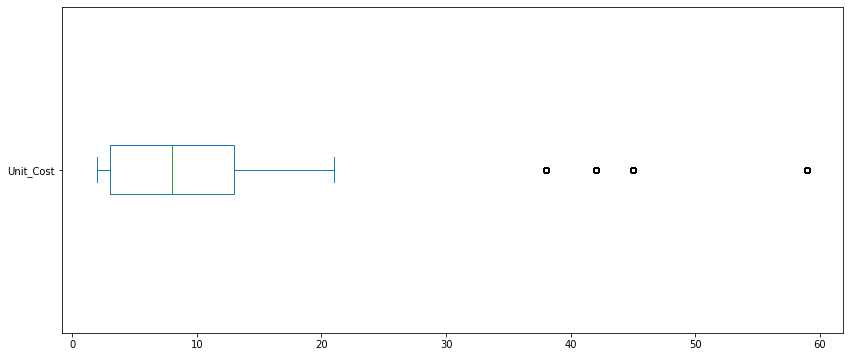

In [14]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

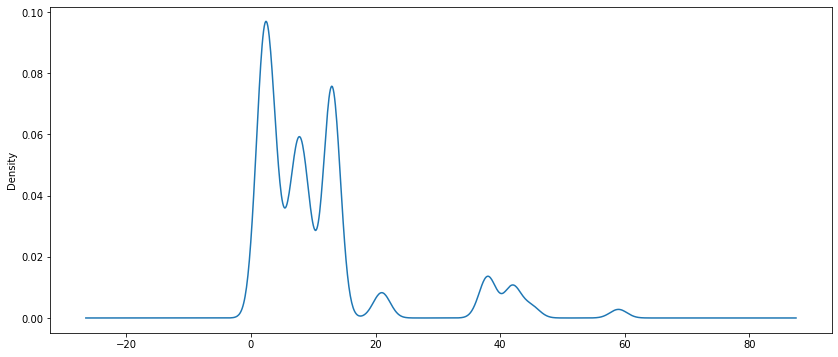

In [15]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde

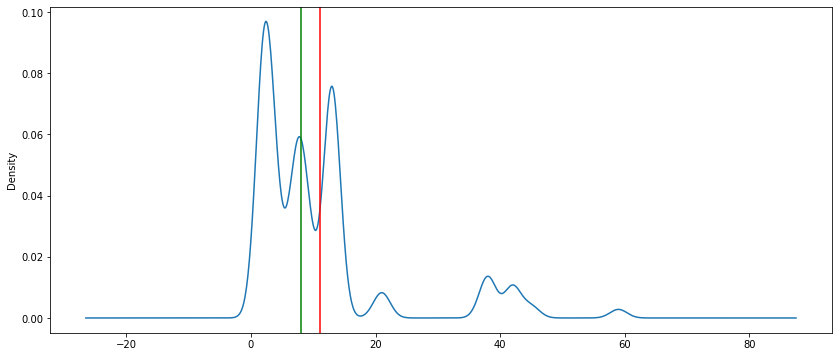

In [16]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

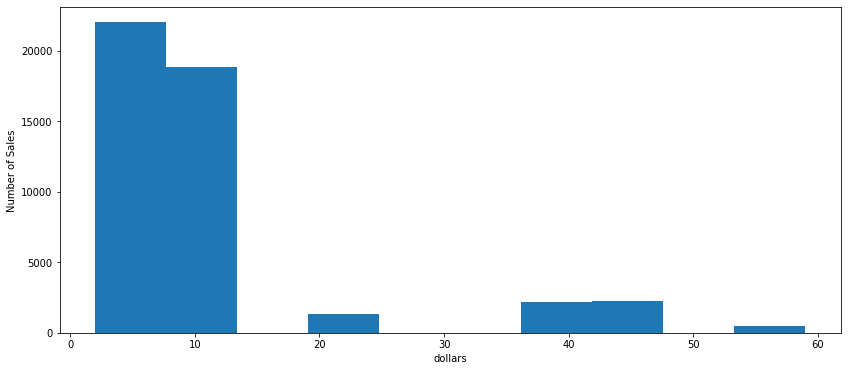

In [17]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `Age_Group` column:

In [18]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [19]:
sales['Age_Group'].value_counts()

Adults (35-64)          23765
Young Adults (25-34)    15846
Youth (<25)              7220
Seniors (64+)             294
Name: Age_Group, dtype: int64

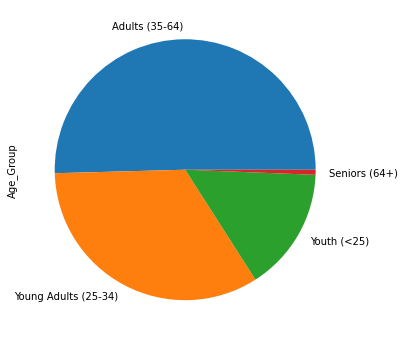

In [20]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

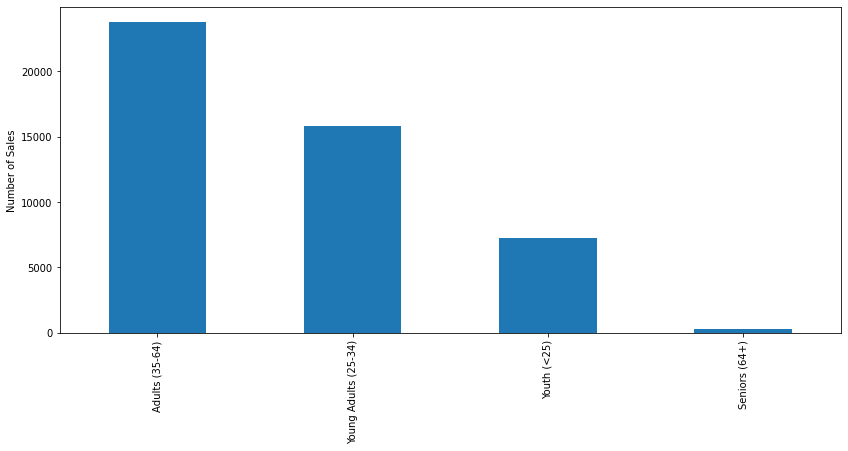

In [21]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

Can we find any significant relationship?

In [22]:
corr = sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.003753,-0.014700,-0.001137,0.005879,0.010824,0.010420,0.005573,0.008953
Year,-0.003753,1.000000,0.023478,-0.028792,-0.015673,-0.015643,-0.024066,-0.025788,-0.028531
Customer_Age,-0.014700,0.023478,1.000000,0.010625,0.016352,0.023690,0.041406,0.027752,0.038985
Order_Quantity,-0.001137,-0.028792,0.010625,1.000000,-0.092811,-0.119812,0.444218,0.418430,0.491632
Unit_Cost,0.005879,-0.015673,0.016352,-0.092811,1.000000,0.891018,0.331395,0.704577,0.605356
Unit_Price,0.010824,-0.015643,0.023690,-0.119812,0.891018,1.000000,0.530943,0.544084,0.614343
Profit,0.010420,-0.024066,0.041406,0.444218,0.331395,0.530943,1.000000,0.531500,0.857186
Cost,0.005573,-0.025788,0.027752,0.418430,0.704577,0.544084,0.531500,1.000000,0.891835
Revenue,0.008953,-0.028531,0.038985,0.491632,0.605356,0.614343,0.857186,0.891835,1.000000


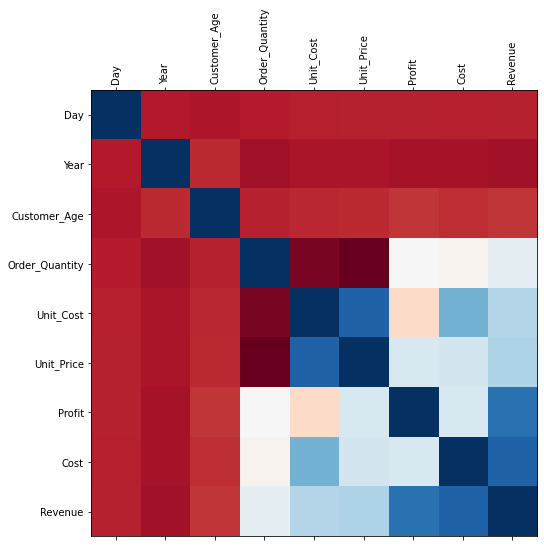

In [23]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

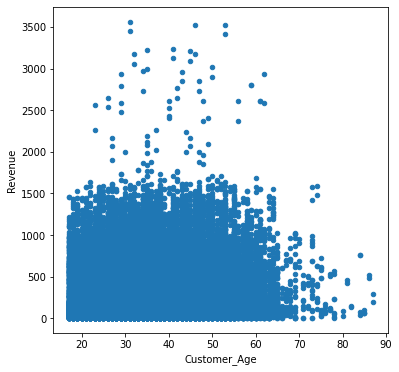

In [24]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

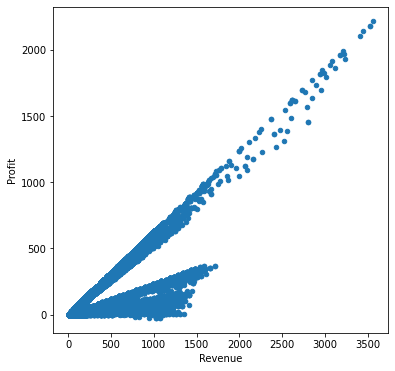

In [25]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Profit')

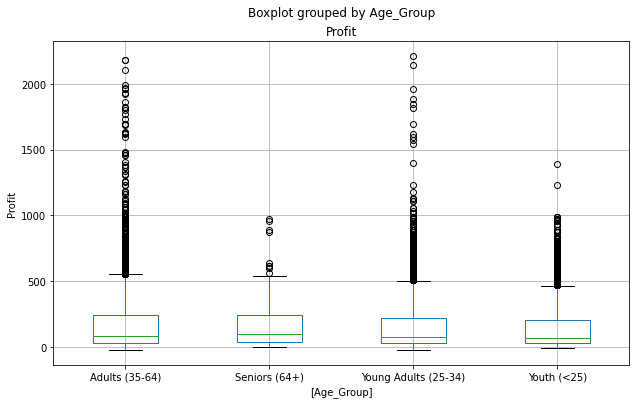

In [26]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

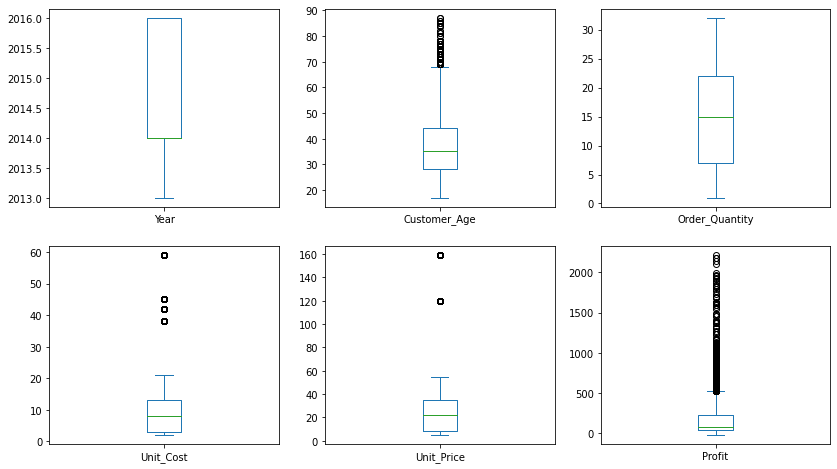

In [27]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `Revenue_per_Age` column

In [28]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

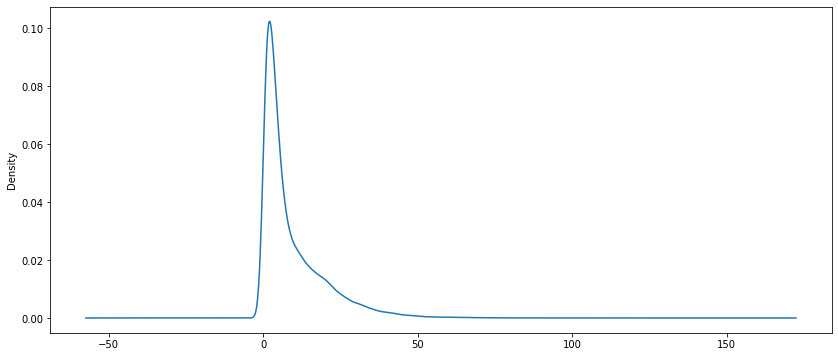

In [29]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

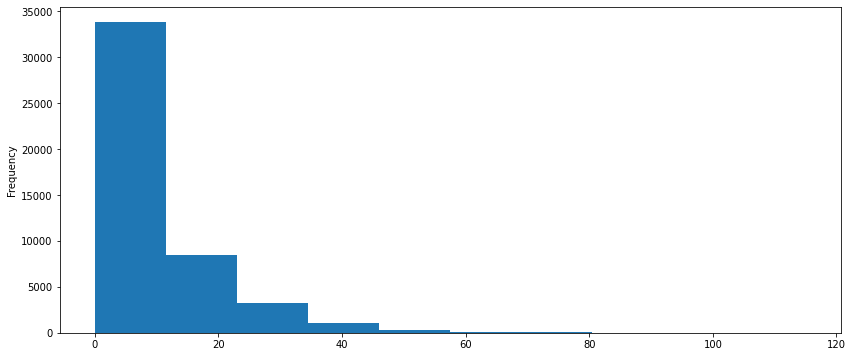

In [30]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

### Add and calculate a new `Calculated_Cost` column

Use this formula

$$ Calculated\_Cost = Order\_Quantity * Unit\_Cost $$

In [31]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360.0
1     360.0
2    1035.0
3     900.0
4     180.0
Name: Calculated_Cost, dtype: float64

In [32]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

1

We can see the relationship between `Cost` and `Profit` using a scatter plot:

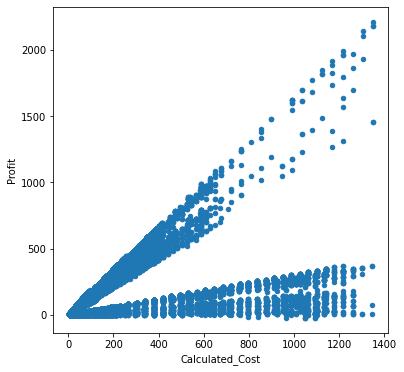

In [33]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

### Add and calculate a new `Calculated_Revenue` column

Use this formula

$$ Calculated\_Revenue = Cost + Profit $$

In [34]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950.0
1     950.0
2    2401.0
3    2088.0
4     418.0
Name: Calculated_Revenue, dtype: float64

In [35]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

1

In [36]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0,50.000000,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0,49.000000,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0,42.612245,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0,8.893617,180.0,418.0


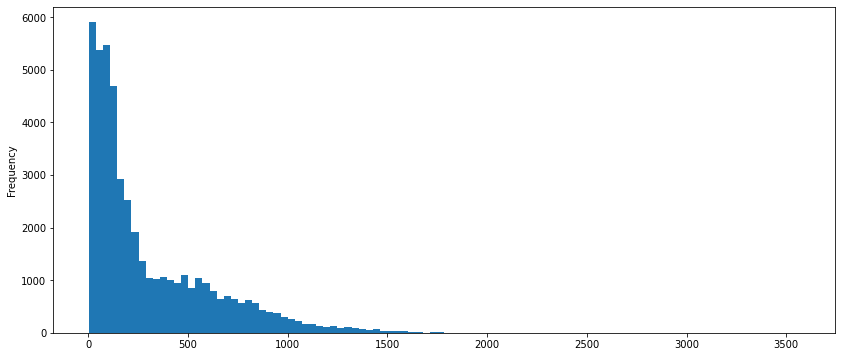

In [37]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [38]:
sales['Unit_Price'].head()

0    120.0
1    120.0
2    120.0
3    120.0
4    120.0
Name: Unit_Price, dtype: float64

In [39]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

In [40]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the sales made in the state of `Kentucky`

In [41]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1.0,45.0,123.60,63.0,45.0,108.0,2.700,45.0,108.0
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12.0,8.0,22.66,142.0,96.0,238.0,5.950,96.0,238.0
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14.0,8.0,22.66,165.0,112.0,277.0,6.925,112.0,277.0
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29.0,13.0,36.05,537.0,377.0,914.0,22.850,377.0,914.0
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31.0,13.0,36.05,574.0,403.0,977.0,24.425,403.0,977.0


### Get the mean revenue of the `Adults (35-64)` sales group

In [42]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

316.56964315771756

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [43]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

30985

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [44]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

312.126763529164

### Increase the revenue by 10% to every sale made in France

In [45]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787.0
51     787.0
52    2957.0
53    2851.0
60     626.0
Name: Revenue, dtype: float64

In [46]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [47]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)